# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- 'ScheduledDay' - tells us on what day the patient set up their appointment.
- 'Neighborhood' - indicates the location of the hospital.
- 'Scholarship'  - indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- 'PatientId'    - Identification of a patient
- 'AppointmentID' - Identification of each appointment
- 'Gender'        - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- 'Age'           - How old is the patient.
- 'Neighbourhood' - Where the appointment takes place.
- 'Scholarship'   - True of False . Observation, this is a broad topic, consider reading this article
- 'Hypertension'  - True or False. tells us whether the patient has hypertension or not
- 'Diabetes'      - True or False. tells us whether the patient has diabetes or not
- 'Alcoholism'    - True or False. tells us whether the patient is into alcohol or not
- 'Handicap'      - True or False. tells us whether the patient is handicapped or not
- 'SMS_received'  - 1 or more messages sent to the patient.
- 'No-show'       - True or False. tells us whether the patient showed up for the medical appointment or not

In this project i will be analysing the data above and try to finding trends amongst patients who showed up for thier medical appointments and how it differs from those who didn't

### Question(s) for Analysis
1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
2. What is the distribution of patients who showed up by different age groups?
3. Which neighbourhood are the patients mostly from?
4. How many patients who have diabetes are also into alcohol
5. What is the mean age of patients who showed up and patients who did not show up for thier appointments?
6. What is the mean age of patients who have hypertension?
7. What is the mean age of patients who received scholarship?
8. What is the mean age of patients who have diabetes?

In [1]:
# importing neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [3]:
# load dataset
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

# display first five rows of dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# number of rows and columns in the dataset

df.shape

(110527, 14)

In [5]:
# datatypes for each column

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
# information on all columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# checking for null values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# checking for duplicate values

df.duplicated().sum()

0

In [9]:
# summary statistics of dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

### Dropping PatientId and AppointmentID column

Here i dropped the patientid and appointmentid because they are unnecessary for our analysis

In [10]:
# dropping patientid and appointmentid column

df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

In [11]:
# confirming they has been dropped

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# checking unique values in age column

df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

### Removing errant data in Age column

Here i removed inconsistent records in the Age column, e.g -1 because it's impossible for a person's age to be -1

In [13]:
# checking row with Age as -1

df.query('Age == -1')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
# dropping the row with Age as -1 and reassigning to dataframe

df = df.drop(index = 99832)

In [15]:
# resetting index

df = df.reset_index()

In [16]:
# verify changes

df.head()

,index,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
# dropping 'index' column created from previous step

df.drop('index', axis = 1, inplace = True)

In [18]:
# verifiying index has been reset

df['Age'].iloc[99831:99834]

99831    7
99832    1
99833    0
Name: Age, dtype: int64

### Correcting column names and changing to lowercase
Here i converted all columns from uppercase to lowercase for convenience, i also renamed the spelling of the hypertension spelt as Hipertension and as well as handicap spelt as Handcap, i also converted all columns from uppercase to lowercase for consistency

In [19]:
# converting column names to lowercase

df.rename(str.lower, axis = 1, inplace = True)

In [20]:
# renaming misplet column names

df.rename(columns = {'hipertension':'hypertension', 'handcap':'handicap'}, inplace = True)

I renamed the 'no-show' column to 'showed' for easy understanding and interpretation of the column. I also had to re-assign the values under them to reflect the appropriate scenerio, i.e change 'No' to 'Yes'

In [21]:
# renaming column no-show to no_show

df.rename(columns = {'no-show':'showed'}, inplace = True)

df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'showed'],
      dtype='object')

In [22]:
# Converting the values under the showed column for easy identification

df['showed'] = df['showed'].apply(lambda x: 'Yes' if x == 'No' else 'No')

In [23]:
# verify changes

df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


<a id='eda'></a>
## Exploratory Data Analysis

1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

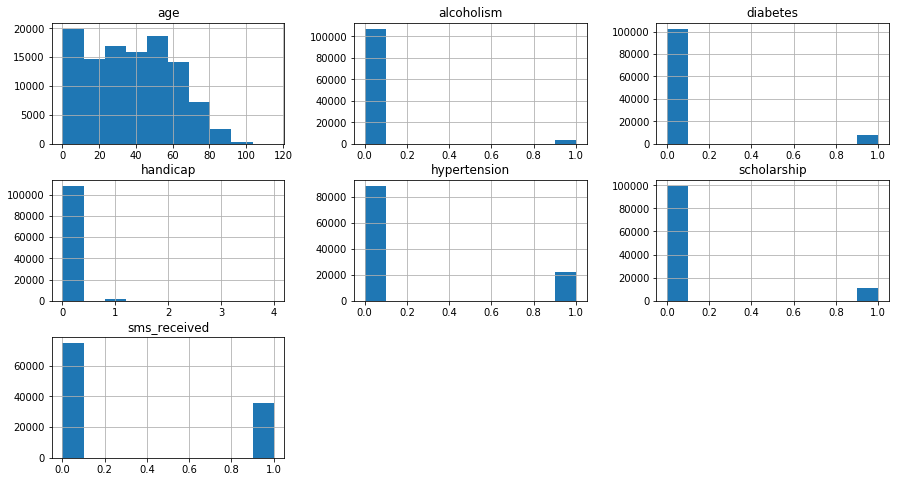

In [24]:
# Histogram distribution of variables in our dataset

df.hist(figsize = (15, 8));

From the above histogram charts, we see from Age histogram chart, that it is skewed to the right, and that most of the patients age largely between 0 and 70

In [25]:
# number of patients who showed up
showed_up = df[df['showed'] == "Yes"].shape[0]

showed_up

#df['no-show'].unique()

88207

In [26]:
# number of patients who didn't show up
missed_count = df[df['showed'] == "No"].shape[0]

missed_count

22319

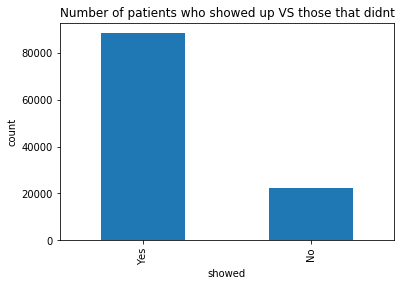

In [27]:
# Number of patients who showed up VS those that didnt
df['showed'].value_counts().plot(kind = 'bar', title = 'Number of patients who showed up VS those that didnt')

plt.xlabel('showed')
plt.ylabel('count');

The bar chart above shows that the number of patients who showed up (88,207) far surpasses those who didn't (22319)

In [28]:
showed_Yes =  df[df['showed'] == "Yes"]

showed_Yes

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,Yes
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,Yes
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,Yes
10,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
12,F,2016-04-28T11:33:51Z,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,Yes


In [29]:
# filtering patients who didnt show up
showed_No = df[df['showed'] == "No"]

showed_No

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,No
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,No
11,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,No
17,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,No
20,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No
21,F,2016-04-27T10:50:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
22,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,No
31,M,2016-04-27T12:07:14Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,1,0,0,0,0,0,No
44,F,2016-04-28T13:27:27Z,2016-04-29T00:00:00Z,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,No
48,F,2016-04-26T07:19:49Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,No


In [30]:
# proportion of patients who showed up for their appointments
prop_showed = round((showed_up/df.shape[0]) * 100)

print(f'{prop_showed}% of patients showed up')

80% of patients showed up


In [31]:
# proportion of patients who didn't show up for their appointments
prop_missed = round((missed_count/df.shape[0]) * 100)

print(f'{prop_missed}% of patients showed up')

20% of patients showed up


### patients who showed up by sms received

In [32]:
# number of patients who showed up by sms received

showed_Yes.groupby('showed')['sms_received'].value_counts()

showed  sms_received
Yes     0               62509
        1               25698
Name: sms_received, dtype: int64

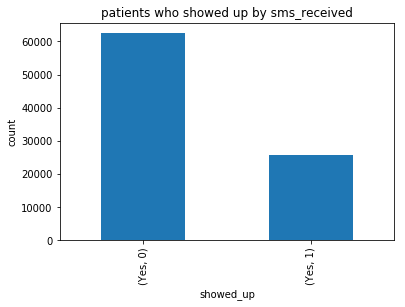

In [33]:
# graph showing count of patients who showed up y sms_received
showed_Yes.groupby('showed')['sms_received'].value_counts().plot(kind = 'bar')
plt.ylabel('count')
plt.xlabel('showed_up')
plt.title('patients who showed up by sms_received');

The visualization above shows that those more of the patients who showed up didn't recieve any sms

In [34]:
# number of patients who didnt show up by sms received

showed_No.groupby('showed')['sms_received'].value_counts()

showed  sms_received
No      0               12535
        1                9784
Name: sms_received, dtype: int64

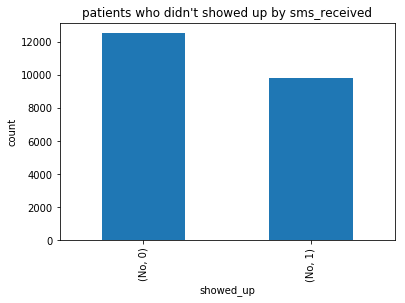

In [35]:
# graph showing number of patients who didn't show up by sms_received

showed_No.groupby('showed')['sms_received'].value_counts().plot(kind = 'bar')
plt.ylabel('count')
plt.xlabel('showed_up')
plt.title("patients who didn't showed up by sms_received");

The visualization above shows that for the patients who didn't showed up the distribution of those who recieved sms and didn't doesnt differ much

### patients who showed up and patients who didnt show up by gender

In [36]:
# number of patients who showed up and didnt show up by gender

df_gender = df.groupby('showed')['gender'].value_counts().to_frame(name = 'count').reset_index()

df_gender

,showed,gender,count
0,No,F,14594
1,No,M,7725
2,Yes,F,57245
3,Yes,M,30962


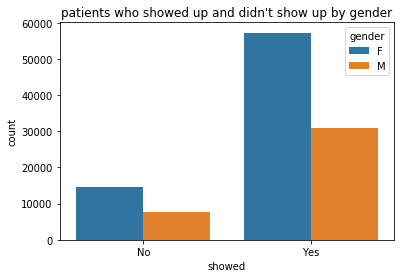

In [37]:
# graph showing number of patients who showed up and didn't show up by gender
#df.groupby('showed')['gender'].value_counts().plot(kind = 'bar')

sns.barplot(x='showed', y='count', hue='gender', data=df_gender);
plt.xlabel('showed')
plt.ylabel('count')
plt.title("patients who showed up and didn't show up by gender");

The visualization above shows that we have more of female patients who showed up.

### patients who showed up and patients who didnt show up by scholarship

In [38]:
# number of patients who showed up and patients who didnt show up by scholarship

df_scholarship = df.groupby('showed')['scholarship'].value_counts().to_frame(name = 'count').reset_index()

In [39]:
df_scholarship

,showed,scholarship,count
0,No,0,19741
1,No,1,2578
2,Yes,0,79924
3,Yes,1,8283


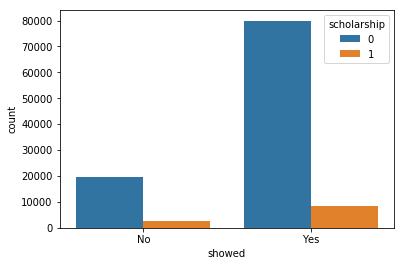

In [40]:
# graph showing number of patients who showed up and patients didn't show up by scholarship

sns.barplot(x='showed', y='count', hue='scholarship', data=df_scholarship);

The visualization above and below tells us that only a small portion of patients recieved schorlarship

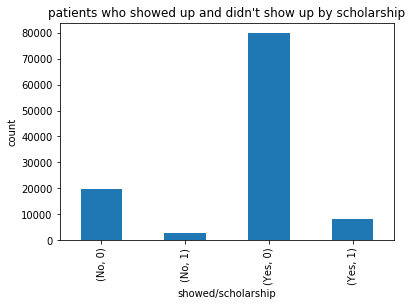

In [41]:
# graph showing number of patients who showed up and patients didn't show up by scholarship
# using matplotlib

df.groupby('showed')['scholarship'].value_counts().plot(kind = 'bar')
plt.xlabel('showed/scholarship')
plt.ylabel('count')
plt.title("patients who showed up and didn't show up by scholarship");

### What is the distribution of patients who showed up by different age groups

In [42]:
# grouping patients by these age groups

teens = df.query('age <= 19')

twenties = df.query('age >=20 & age <30')

thirties = df.query('age >= 30 & age <40')

fourties = df.query('age >= 40 & age <50')

fifties = df.query('age >= 50 & age < 60')

older = df.query('age >= 60')

In [43]:
list1 = [teens, twenties, thirties, fourties, fifties, older]

In [44]:
# creating a function that gets a count of patients who showed up from the different age groups
# and storing it in a list 'count'

count = []
Age_group = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'older']

def ageGroup(a_list):
    
    for age_group in a_list:
        num = age_group[age_group['showed']=='Yes'].showed.count()
        group = str(age_group)
        print (num)
        count.append(num)


In [45]:
# confirming our function works

ageGroup(list1)

23670
10319
11871
11329
13087
17931


In [46]:
# checking our list created from the previous function/
Count = np.array(count).reshape(1,6)

Count.shape

(1, 6)

In [47]:
# creating a subdataframe from the agegroups
df_Age_group = pd.DataFrame({'Age_group':Age_group, 'Count': count})

data_sorted = df_Age_group.sort_values('Count', ascending= False)

data_sorted

,Age_group,Count
0,teens,23670
5,older,17931
4,fifties,13087
2,thirties,11871
3,fourties,11329
1,twenties,10319


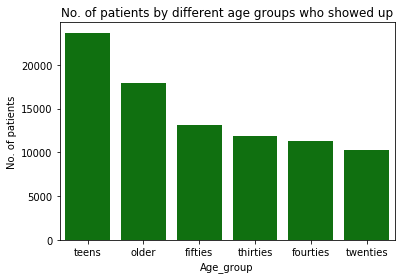

In [48]:
# visualising our above data

#plt.bar('Age_group', 'Count', color ='green', data = data_sorted, width = 0.4)

sns.barplot(x= 'Age_group', y = 'Count', color ='green', data = data_sorted)
plt.xlabel("Age_group")
plt.ylabel("No. of patients")
plt.title("No. of patients by different age groups who showed up")
plt.show()

The chart above shows that the teen age group and older age group were the the ones who showed up the most, while the patients in thier twenties showed up the least.

### Which neighbourhood are the patients mostly from

In [49]:
# neighbourhood where patients are mostly from

df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

### How many patients who have diabetes are also into alcohol

In [50]:
# percentage of patients who have diabetes and are also into  alcoholics

alc_dia_prop = round(df[df.alcoholism == 1].diabetes.sum()/df[df.diabetes == 1].diabetes.sum() * 100, 2)

print(f'{alc_dia_prop}% of patients who have diabetes also are alcoholics')

4.18% of patients who have diabetes also are alcoholics


In [51]:
neighbourhood_max = df[df['neighbourhood'] == 'JARDIM CAMBURI']

neighbourhood_max

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
72,F,2016-04-29T07:37:37Z,2016-04-29T00:00:00Z,61,JARDIM CAMBURI,0,0,0,0,0,0,Yes
398,F,2016-04-28T16:52:04Z,2016-04-29T00:00:00Z,43,JARDIM CAMBURI,0,0,0,0,0,0,Yes
444,M,2016-04-15T14:22:02Z,2016-04-29T00:00:00Z,13,JARDIM CAMBURI,0,0,0,0,0,1,Yes
445,F,2016-04-14T11:01:47Z,2016-04-29T00:00:00Z,65,JARDIM CAMBURI,0,1,0,0,0,1,Yes
446,F,2016-04-08T14:13:23Z,2016-04-29T00:00:00Z,60,JARDIM CAMBURI,0,0,0,0,0,1,No
447,F,2016-04-08T10:58:48Z,2016-04-29T00:00:00Z,21,JARDIM CAMBURI,0,0,0,0,0,1,Yes
448,M,2016-04-11T08:06:06Z,2016-04-29T00:00:00Z,12,JARDIM CAMBURI,0,0,0,0,0,1,No
449,F,2016-04-29T16:07:41Z,2016-04-29T00:00:00Z,11,JARDIM CAMBURI,0,0,0,0,0,0,Yes
450,M,2016-04-29T16:03:44Z,2016-04-29T00:00:00Z,12,JARDIM CAMBURI,0,0,0,0,0,0,Yes
451,F,2016-04-01T15:48:20Z,2016-04-29T00:00:00Z,32,JARDIM CAMBURI,0,0,0,0,0,1,Yes


In [52]:
neighbourhood_max.shape

(7717, 12)

In [53]:
#proportion of patients from 'Jardim Camburi'
neighbourhood_max.shape[0] / df.shape[0] * 100

6.9820675678120985

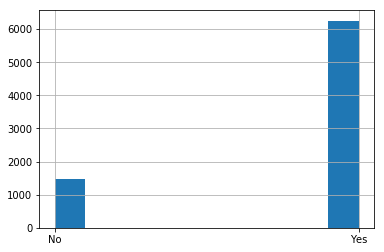

In [54]:
# histogram distribution of patients from 'Jardim Camburi' who showed up and didn't show up
neighbourhood_max.showed.hist();

The plot above shows that we have more patients who showed up for thier appointments than those who didn't in the jardim camburi neighbourhood

### What is the mean age of patients who showed up  and did not show up for thier appointments

In [55]:
# mean age for patients who showed up

df.query('showed == "Yes"')['age'].mean()

37.790504154999034

In [56]:
# mean age for patients who didn't showed up

df.query('showed == "No"')['age'].mean()

34.31766656212196

### What is the mean age of patients who have hypertension

In [57]:
df[df['hypertension'] == 1].age.mean()

60.61359570661896

### What is the mean age of patients who received scholarships

In [58]:
df[df['scholarship'] == 1].age.mean()

30.616241598379524

### What is the mean age of patients who have diabetes

In [59]:
df[df['diabetes'] == 1].age.mean()

61.37252927105627

<a id='conclusions'></a>
## Conclusions

1. From the histogram plots, it was difficult to determine the factors that could be considered to predict if a patient would show up for a scheduled appointment although my findings from them are as follows:

    - Gender: Close half of the total number of patients (57245) who showed up for thier appointments were of female gender
    - Scholarship: About 80,000 patients who showed up for their appointsments didn't recieve a scholarship
    - Teen and Older age group: Majority of patients who showed up for their appointments where in this age categories  
    
    
2. It was found that majority of the patients came from the 'JARDIM CAMBURI' neighbourhood


3. 4.18% of patients who have diabetes also are also into alcoholism


4. The mean age of patients who showed up and patients who did not show up for thier appointments was found to be
   38 and 34 years respectively
   
   
5. The mean age of patients who have hypertension is about 61 years


6. The mean age of patients who received scholarships is about 31 years, meaning the younger patients are more likely to 

   recieve scholarships
    

7. Thee mean age of patients who have diabetes is about 61 years





### Limitations:

1. Binary data values for some columns, hence hindering me from create a useful scatter plot to find correlations between the      variables


2. The 'handicap' column has 5 unique values with no explanation to what they mean, hence preventing me from getting useful        insights with that part of the data

In [60]:
df.handicap.unique()

array([0, 1, 2, 3, 4])

In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0